<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/FaceRecognitionIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.datasets import fetch_olivetti_faces



#IMPLEMENTING FACE RECOGNITION

In this Project we will be using the [Olivetti Dataset]( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html?highlight=olivetti#sklearn.datasets.fetch_olivetti_faces) of faces. We will be implementing the following algorithms:


-KNN

-Decision Tree

-OLS Regression

-Logistic Regression

-Random Forest

-SVM

We will be creating a confusion matrix for each of them and comparing them. We will then compare their accuracy, limitations, advantages and how we can improve on the accuracy and performance. 
We will observe and demonstrate the bias-variance tradeoff that occurs when you choose to work with different numbers of components while implementing the PCA algorithm.


Here we import and access the faces data.

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

faces = datasets.fetch_olivetti_faces()
print("The dataset has the following keys: ", faces.keys())
print("The shape of the faces dataset is: ", faces['images'].shape)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
The dataset has the following keys:  dict_keys(['data', 'images', 'target', 'DESCR'])
The shape of the faces dataset is:  (400, 64, 64)


Printing the faces to observe data.

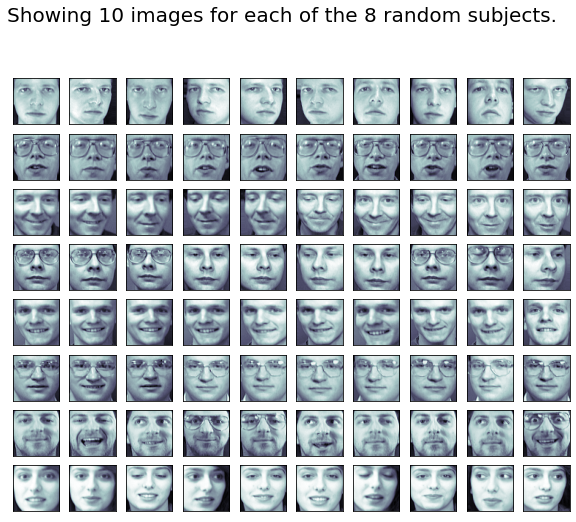

In [ ]:
fig = plt.figure(figsize=(10,10))

#generating 10 images of each of the 8 random subjects   
for k in range(80):
  ax = fig.add_subplot(10,10,k+1)
  ax.imshow(faces.images[k], cmap = plt.cm.bone)
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])
fig.suptitle('Showing 10 images for each of the 8 random subjects.', fontsize=20)
#plt.title("Showing 10 images for each of the 8 random subjects.")
plt.show();


We will create an 80:20 training-test split.


In [ ]:
from sklearn.model_selection import train_test_split

x = faces.data
y = faces.target 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=faces.target, random_state =0)

In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.


In [ ]:
from sklearn.preprocessing import StandardScaler 

"""
determine the mean and standard deviation to be utilized for scaling in the future. 
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
 Here, the model built by us will learn the mean and variance of the features of the training set. 
 These learned parameters are then used to scale our test data. x_test is only transformed using parameter values generated after model 
 training on x_train

"""
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print("The shape of the training dataset is : ",x_train.shape)


The shape of the training dataset is :  (320, 4096)


Creating covariance matrices:

In [ ]:
"""
calculating covariance which is the product of transpose of matrix with matrix itself. this will generate variance values between 
each feature. "+" values represent the features being positively dependent on each other whereas "-" values represent inverse dependence.
"""
cov_mat_train = np.cov(x_train.T)
cov_mat_test = np.cov(x_test.T)
print("The covariance matrix of the dataset is: \n",cov_mat_train)
print("The dimensions of the matrix are :", len(cov_mat_test),"*",len(cov_mat_train[0]))

The covariance matrix of the dataset is: 
 [[ 1.00313481  0.95173707  0.82534307 ... -0.17875122 -0.16391885
  -0.11924827]
 [ 0.95173707  1.00313482  0.92621298 ... -0.24764167 -0.23212771
  -0.1800796 ]
 [ 0.82534307  0.92621298  1.00313479 ... -0.32644762 -0.30398387
  -0.25199303]
 ...
 [-0.17875122 -0.24764167 -0.32644762 ...  1.0031348   0.91780859
   0.82015904]
 [-0.16391885 -0.23212771 -0.30398387 ...  0.91780859  1.00313481
   0.93899179]
 [-0.11924827 -0.1800796  -0.25199303 ...  0.82015904  0.93899179
   1.00313482]]
The dimensions of the matrix are : 4096 * 4096


Performing eigendecomposition on covariance matrix or PCA:


In [ ]:
eigval, eigvec = np.linalg.eig(cov_mat_train)
eigval_test, eigvec_test = np.linalg.eig(cov_mat_test)
print('Eigenvalues:',eigval)
print('Eigenvectors', eigvec)

for i in range(0,len(eigvec)):
  print(f'eigenvalue {i+1} = {eigval[i]}, \n eigenvector {i+1}= {eigvec[:,i]}')
  print('----')



Streaming output truncated to the last 5000 lines.
 -6.26449352e-03-7.97530381e-03j -1.06151657e-02+7.16126875e-03j]
----
eigenvalue 3090 = (-2.7468843158804652e-15+1.3874277623975514e-15j), 
 eigenvector 3090= [-0.00032567-7.04575398e-04j -0.00022764+1.69887144e-05j
 -0.0001458 -9.02210788e-05j ...  0.0164231 +1.37597500e-02j
 -0.02051918-3.61633764e-03j -0.01965002-7.99305081e-04j]
----
eigenvalue 3091 = (-2.7468843158804652e-15-1.3874277623975514e-15j), 
 eigenvector 3091= [-0.00032567+7.04575398e-04j -0.00022764-1.69887144e-05j
 -0.0001458 +9.02210788e-05j ...  0.0164231 -1.37597500e-02j
 -0.02051918+3.61633764e-03j -0.01965002+7.99305081e-04j]
----
eigenvalue 3092 = (-3.275216525173356e-15+1.0267918814389339e-15j), 
 eigenvector 3092= [-0.00289813-1.33210061e-03j -0.00024916-2.62129653e-05j
 -0.00012701+2.31333645e-04j ...  0.01129205-5.83068864e-03j
 -0.00380012-4.22701768e-03j -0.02129483-3.19153162e-02j]
----
eigenvalue 3093 = (-3.275216525173356e-15-1.0267918814389339e-15j), 


In [ ]:
# calculating the explained variance of each principal component
exp_var = eigval/ np.sum(eigval)
cum_var =0

#print explained variances 
for i in range(0, 1000):
  cum_var +=exp_var[i]
  print(f'{np.round(exp_var[i],4)} = explained variance of PC {i+1}')
  print(f'{np.round(cum_var,4)} = explained cumulative variance of PC {i+1}')



(0.2648+0j) = explained variance of PC 1
(0.2648+0j) = explained cumulative variance of PC 1
(0.1232+0j) = explained variance of PC 2
(0.388+0j) = explained cumulative variance of PC 2
(0.078+0j) = explained variance of PC 3
(0.466+0j) = explained cumulative variance of PC 3
(0.0481+0j) = explained variance of PC 4
(0.5141+0j) = explained cumulative variance of PC 4
(0.0329+0j) = explained variance of PC 5
(0.547+0j) = explained cumulative variance of PC 5
(0.031+0j) = explained variance of PC 6
(0.578+0j) = explained cumulative variance of PC 6
(0.0245+0j) = explained variance of PC 7
(0.6025+0j) = explained cumulative variance of PC 7
(0.0209+0j) = explained variance of PC 8
(0.6233+0j) = explained cumulative variance of PC 8
(0.0184+0j) = explained variance of PC 9
(0.6417+0j) = explained cumulative variance of PC 9
(0.0174+0j) = explained variance of PC 10
(0.6591+0j) = explained cumulative variance of PC 10
(0.0156+0j) = explained variance of PC 11
(0.6746+0j) = explained cumulati

First lets find the optimum number of PCA components. 

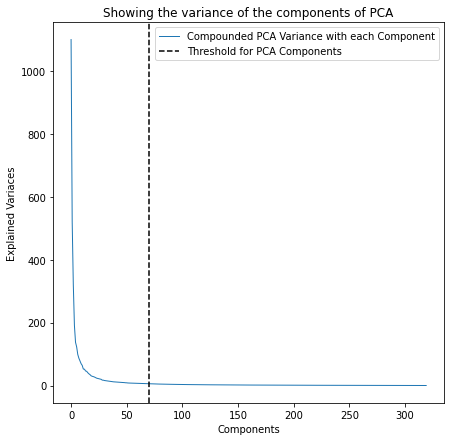

In [ ]:
pca = PCA()
pca.fit(x_train)
plt.figure(1, figsize=(7,7))
plt.plot(pca.explained_variance_, linewidth=1, label='Compounded PCA Variance with each Component')
plt.axvline(x = 70, color = 'black', linestyle='dashed',label='Threshold for PCA Components')
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.title("Showing the variance of the components of PCA")
plt.legend()
plt.show()

In the figure above, it can be seen that 70 and more PCA components represent the same data. Now let's make the classification process using 70 PCA components.



In [ ]:
components = 70
pca = PCA(n_components = components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("The new shape of the training set is :",x_train_pca.shape)
print("The new shape of the testing set is :",x_test_pca.shape)

The new shape of the training set is : (320, 70)
The new shape of the testing set is : (80, 70)


Seeing what the approximate images look like.

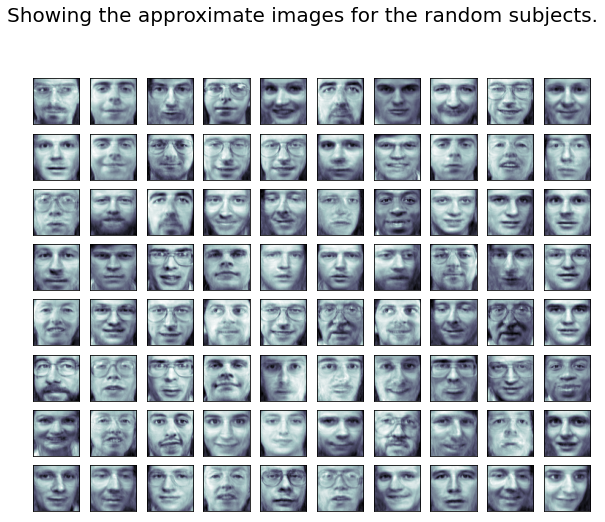

In [ ]:
pca=PCA(n_components=components,whiten= True)
x_transformed=pca.fit_transform(x_train)
x_transformed.shape
x_approx= pca.inverse_transform(x_transformed)
x_approx= x_approx.reshape((320,64,64))
fig = plt.figure(figsize=(10,10))

#generating 10 images of each of the 8 random subjects   
for k in range(80):
  ax = fig.add_subplot(10,10,k+1)
  ax.imshow(x_approx[k], cmap = plt.cm.bone)
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])
fig.suptitle('Showing the approximate images for the random subjects.', fontsize=20)
plt.show();



Average Face

Text(0.5, 1.0, 'Average Face')

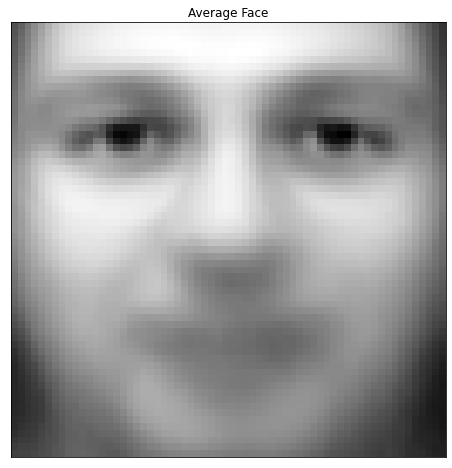

In [ ]:
pca.fit(x_train)
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')


All Eigenfaces 

Text(0.5, 0.98, 'All EigenFaces')

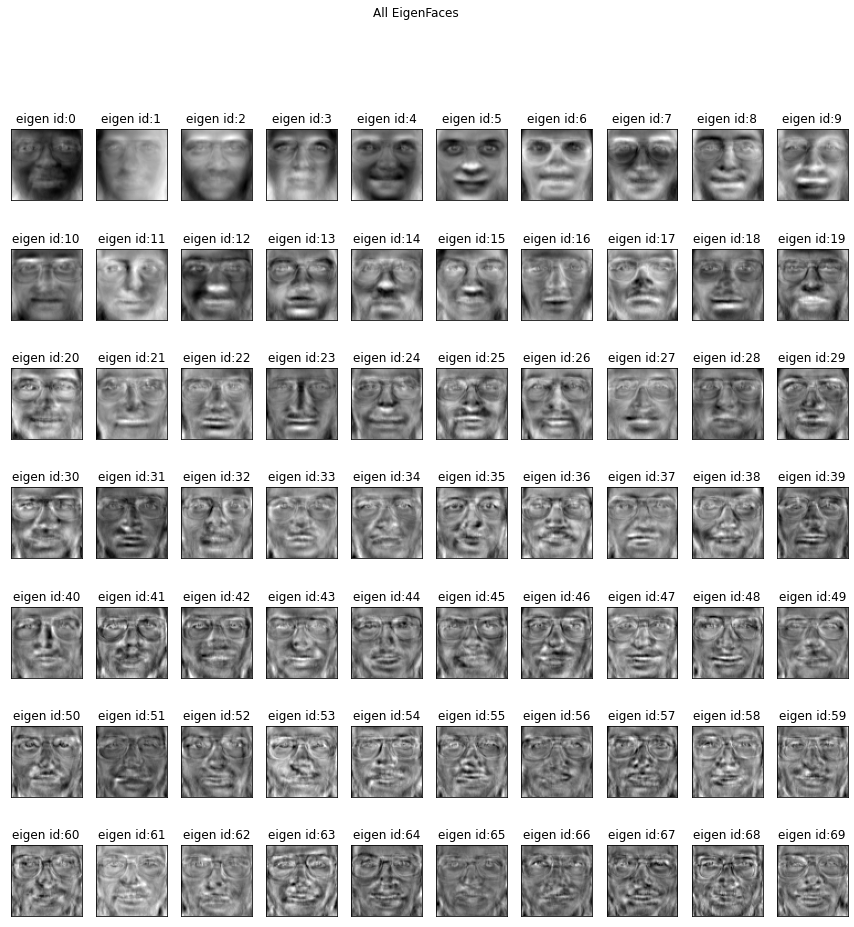

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, faces['images'].shape[1], faces['images'].shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All EigenFaces".format(10*"=", 10*"="))

Implementing the following algorithms: 
- KNN 
- Decision Tree
- OLS Regression
- Logistic Regression
- Random Forest
- SVM

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
import statsmodels.api as sm  
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=7)
clf1 = DecisionTreeClassifier()
x_train_pca1 = sm.add_constant(x_train_pca)
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
lr=LogisticRegression(max_iter=1000)
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}
gridforsvm=GridSearchCV(clf,grid)

#train logisitc regression model 
knn.fit(x_train, y_train)
clf.fit(x_train, y_train)
model = sm.OLS(y_train,x_train_pca1).fit()
#print(x_train_pca.shape)
lr.fit(x_train_pca,y_train)
regressor.fit(x_train_pca, y_train)  

#predict response for test dataset
y_predict1 = knn.predict(x_test)
y_predict = clf.predict(x_test)
summary = str(model.summary())
y_predict2=lr.predict(x_test_pca)
y_predict3 = regressor.predict(x_test_pca)
gridforsvm.fit(x_train_pca, y_train)
y_predict4=gridforsvm.predict(x_test_pca)



summary = summary.splitlines()
loc = []
for i in summary:
  if(re.findall(r'Adj. R-squared:',i)):
    loc.append(summary[summary.index(i)])
accuracy = 0
for l in loc:
  #print(l)
  for w in l.split(':'):
    #print(w.strip())
    if re.findall(r'\w[.]\d{3}',w.strip()):
      #print(w)
      accuracy=(float(w.strip()))

Evaluating the algorithms


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns


confusion_knn = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
#print(confusion_knn)
print("Accuracy score:{:.2f} of KNN".format(metrics.accuracy_score(y_test, y_predict)))
knna = round(metrics.accuracy_score(y_test, y_predict),2)
confusion_dt = pd.crosstab(y_test, y_predict1, rownames=['Actual'], colnames=['Predicted'], margins=True)
#confusion_dt

print("Accuracy score:{:.2f} of DecisionTree".format(metrics.accuracy_score(y_test, y_predict1)))
dta = round(metrics.accuracy_score(y_test, y_predict1),2)

olsa = round(accuracy,2)
print("Accuracy score:{:.2f} of OLS Regression".format(accuracy))

lra = round(metrics.accuracy_score(y_test, y_predict2),2)
print("Accuracy score:{:.2f} of Logistic Regression".format(metrics.accuracy_score(y_test, y_predict2)))

rfa = round(regressor.score(x_test_pca, y_test),2)
print("Accuracy score:{:.2f} of Random Forest".format(regressor.score(x_test_pca, y_test)))

svma = round(gridforsvm.score(x_test_pca, y_test),2)
gridforsvm.best_estimator_
print("Accuracy score:{:.2f} of SVM".format(gridforsvm.score(x_test_pca, y_test)))

Accuracy score:0.95 of KNN
Accuracy score:0.78 of DecisionTree
Accuracy score:0.54 of OLS Regression
Accuracy score:0.94 of Logistic Regression
Accuracy score:0.50 of Random Forest
Accuracy score:0.96 of SVM


In [ ]:
def plot_gallery(clf,acc,images,titles,h,w,row=3,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(33):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle('Showing the predictions and their true values for : '+str(clf)+' with accuracy : '+str(acc), fontsize=20)
def title(y_pred,y_test,i):
    return 'pred: %s\n true: %s'%(y_pred[i],y_test[i])


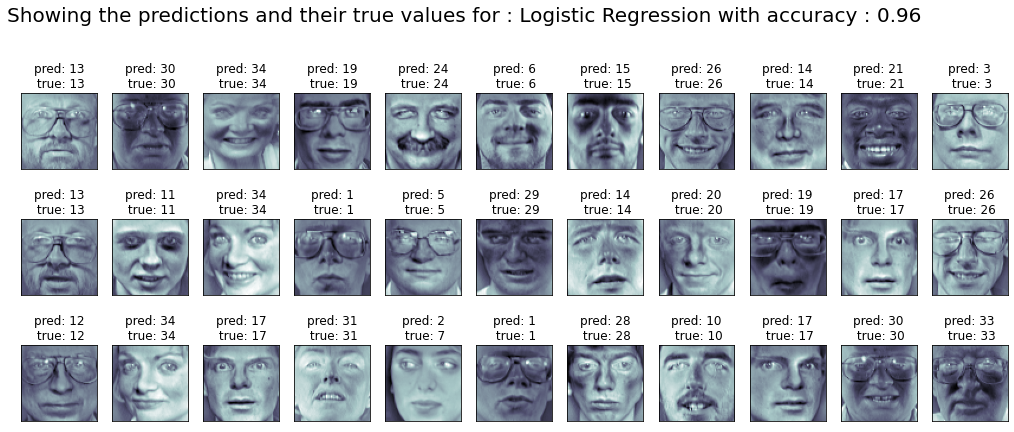

In [ ]:
prediction3 = [title(y_predict2,y_test,i) for i in range(y_predict2.shape[0])]
plot_gallery('Logistic Regression',lra,x_test,prediction3,64,64)

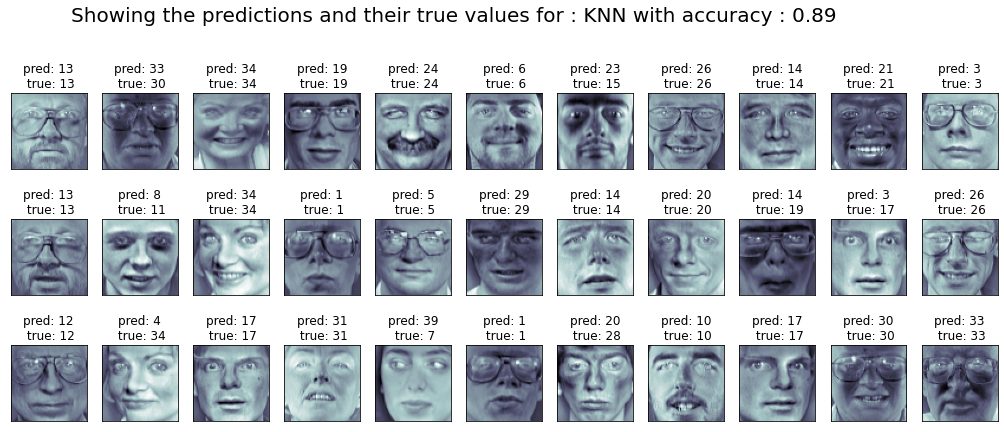

In [ ]:
prediction3 = [title(y_predict1,y_test,i) for i in range(y_predict1.shape[0])]
plot_gallery('KNN',knna,x_test,prediction3,64,64)

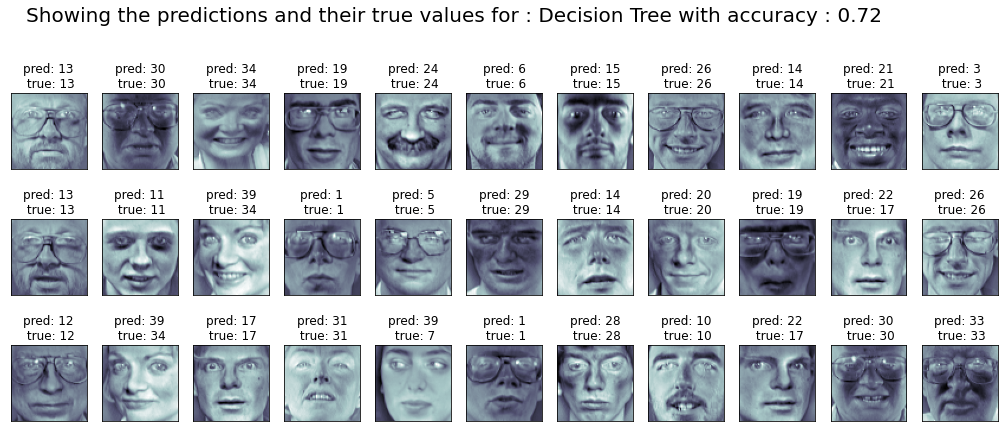

In [ ]:
prediction3 = [title(y_predict,y_test,i) for i in range(y_predict.shape[0])]
plot_gallery('Decision Tree',dta,x_test,prediction3,64,64)

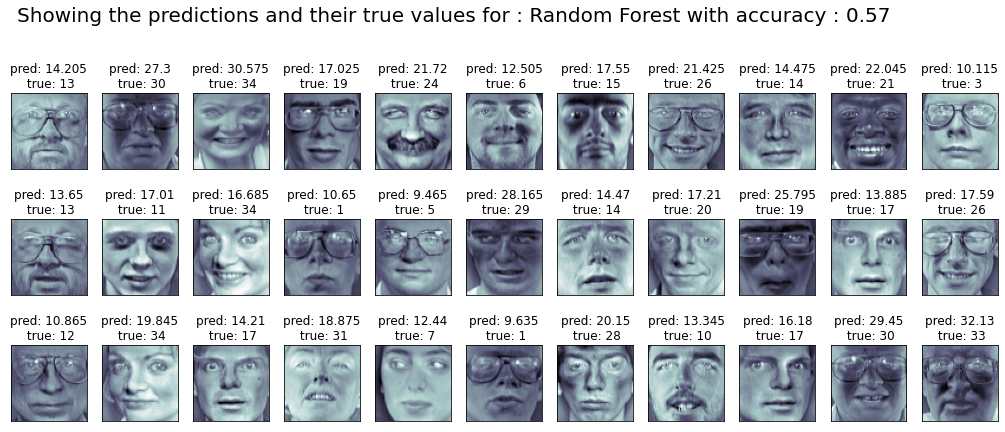

In [ ]:
prediction3 = [title(y_predict3,y_test,i) for i in range(y_predict3.shape[0])]
plot_gallery('Random Forest',rfa,x_test,prediction3,64,64)

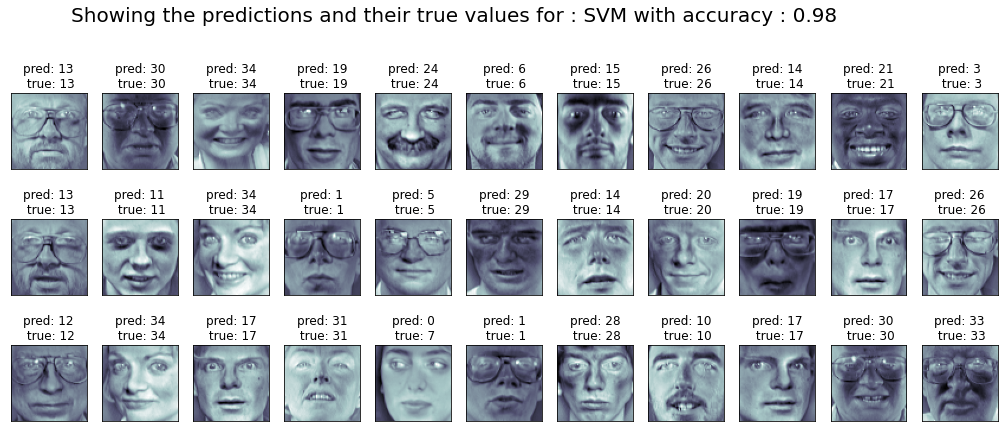

In [ ]:
prediction3 = [title(y_predict4,y_test,i) for i in range(y_predict4.shape[0])]
plot_gallery('SVM',svma,x_test,prediction3,64,64)

#Testing the algorithm with different number of components.

In [ ]:
from sklearn.model_selection import train_test_split

x = faces.data
y = faces.target 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=faces.target, random_state =0)
components = 3
pca = PCA(n_components = components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("The new shape of the training set is :",x_train_pca.shape)
print("The new shape of the testing set is :",x_test_pca.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
import statsmodels.api as sm  
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=7)
clf1 = DecisionTreeClassifier()
x_train_pca1 = sm.add_constant(x_train_pca)
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
lr=LogisticRegression(max_iter=1000)
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}
gridforsvm=GridSearchCV(clf,grid)

#train logisitc regression model 
knn.fit(x_train, y_train)
clf.fit(x_train, y_train)
model = sm.OLS(y_train,x_train_pca1).fit()
#print(x_train_pca.shape)
lr.fit(x_train_pca,y_train)
regressor.fit(x_train_pca, y_train)  

#predict response for test dataset
y_predict1 = knn.predict(x_test)
y_predict = clf.predict(x_test)
summary = str(model.summary())
y_predict2=lr.predict(x_test_pca)
y_predict3 = regressor.predict(x_test_pca)
gridforsvm.fit(x_train_pca, y_train)
y_predict4=gridforsvm.predict(x_test_pca)



summary = summary.splitlines()
loc = []
for i in summary:
  if(re.findall(r'Adj. R-squared:',i)):
    loc.append(summary[summary.index(i)])
accuracy = 0
for l in loc:
  #print(l)
  for w in l.split(':'):
    #print(w.strip())
    if re.findall(r'\w[.]\d{3}',w.strip()):
      #print(w)
      accuracy=(float(w.strip()))

from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns


confusion_knn = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
#print(confusion_knn)
print("Accuracy score:{:.2f} of KNN".format(metrics.accuracy_score(y_test, y_predict)))
knna = round(metrics.accuracy_score(y_test, y_predict),2)
confusion_dt = pd.crosstab(y_test, y_predict1, rownames=['Actual'], colnames=['Predicted'], margins=True)
#confusion_dt

print("Accuracy score:{:.2f} of DecisionTree".format(metrics.accuracy_score(y_test, y_predict1)))
dta = round(metrics.accuracy_score(y_test, y_predict1),2)

olsa = round(accuracy,2)
print("Accuracy score:{:.2f} of OLS Regression".format(accuracy))

lra = round(metrics.accuracy_score(y_test, y_predict2),2)
print("Accuracy score:{:.2f} of Logistic Regression".format(metrics.accuracy_score(y_test, y_predict2)))

rfa = round(regressor.score(x_test_pca, y_test),2)
print("Accuracy score:{:.2f} of Random Forest".format(regressor.score(x_test_pca, y_test)))

svma = round(gridforsvm.score(x_test_pca, y_test),2)
gridforsvm.best_estimator_
print("Accuracy score:{:.2f} of SVM".format(gridforsvm.score(x_test_pca, y_test)))

The new shape of the training set is : (320, 70)
The new shape of the testing set is : (80, 70)
Accuracy score:0.95 of KNN
Accuracy score:0.78 of DecisionTree
Accuracy score:0.55 of OLS Regression
Accuracy score:0.94 of Logistic Regression
Accuracy score:0.48 of Random Forest
Accuracy score:0.95 of SVM


#Showing the Confusion Matrices for the algorithms.

<Figure size 1440x1440 with 0 Axes>

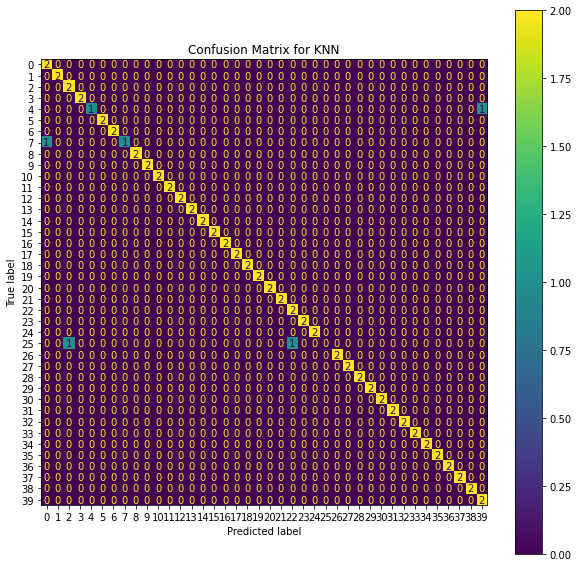

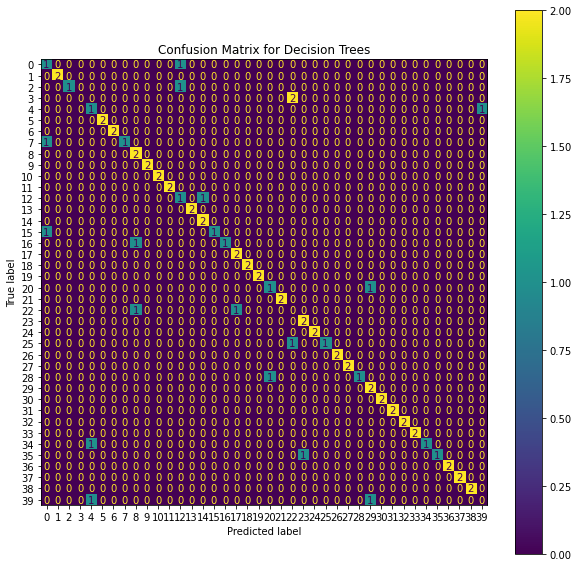

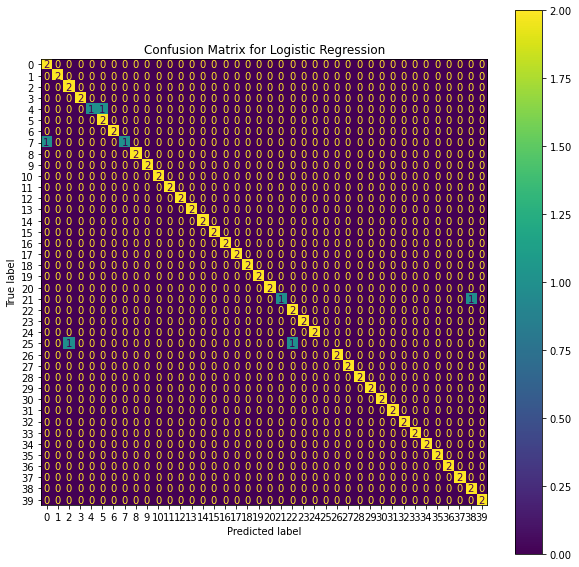

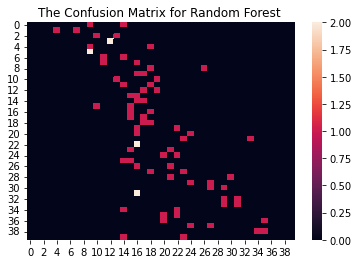

Text(0.5, 1.0, 'The Confusion Matrix for SVM')

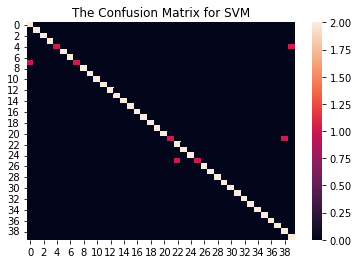

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)


plt.figure(figsize=(20,20))
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 
plt.title('Confusion Matrix for KNN')
plt.show();

cm = confusion_matrix(y_test, y_predict1, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 
plt.title('Confusion Matrix for Decision Trees')
plt.show();


cm = confusion_matrix(y_test, y_predict2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 
plt.title('Confusion Matrix for Logistic Regression')
plt.show();

from sklearn.metrics import confusion_matrix

y_predict3 = [int(item) for item in y_predict3]
conf_mat = confusion_matrix(y_test, y_predict3)
sns.heatmap(conf_mat)
plt.title('The Confusion Matrix for Random Forest ')
plt.show()



matrix = confusion_matrix(y_test, y_predict4)
sns.heatmap(matrix)
plt.title('The Confusion Matrix for SVM') 